In [ ]:
# Authenticate and access Google Cloud services
from google.colab import auth
auth.authenticate_user()

In [ ]:
# Import the necessary libraries
from google.cloud import storage
from google.cloud import bigquery

In [ ]:
# Import the necessary libraries
from google.cloud import storage
from google.cloud import bigquery

# First make connection to BigQuery
# Replace 'your-project-id' with your Google Cloud project ID
# Replace 'your-dataset-name' with your dataset name
project_id = "pristine-flames-422615-m1"
dataset_name = "ima_dataset"
table_names = ["restaurant_data", "restaurant_tips", "restaurant_checkin"] # if you make changes previously, then here you need to make according change

bigquery_client = bigquery.Client(project=project_id)

In [ ]:
# Query all data from the table
query = f"""
    SELECT *
    FROM `{project_id}.{dataset_name}.restaurant_data`
    ORDER BY business_id
"""

query_job_data = bigquery_client.query(query)
results = query_job_data.result()

restaurant_data_df = query_job_data.to_dataframe()
restaurant_data_df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,NoiseLevel,GoodForMeal,BusinessAcceptsBitcoin,Smoking,Music,GoodForDancing,BestNights,BYOB,Corkage,Parking
0,---kPU91CF4Lq2-WlRu9Lw,Frankie's Raw Bar,4903 State Rd 54,New Port Richey,FL,34652,28.217288,-82.733344,4.5,24,...,None,None,False,None,None,<NA>,None,True,False,True
1,---kPU91CF4Lq2-WlRu9Lw,Frankie's Raw Bar,4903 State Rd 54,New Port Richey,FL,34652,28.217288,-82.733344,4.5,24,...,None,None,False,None,None,<NA>,None,True,False,True
2,---kPU91CF4Lq2-WlRu9Lw,Frankie's Raw Bar,4903 State Rd 54,New Port Richey,FL,34652,28.217288,-82.733344,4.5,24,...,None,None,False,None,None,<NA>,None,True,False,True
3,---kPU91CF4Lq2-WlRu9Lw,Frankie's Raw Bar,4903 State Rd 54,New Port Richey,FL,34652,28.217288,-82.733344,4.5,24,...,None,None,False,None,None,<NA>,None,True,False,True
4,--0iUa4sNDFiZFrAdIWhZQ,Pupuseria Y Restaurant Melba,6 S White Horse Pike,Clementon,NJ,08021,39.817850,-74.993364,3.0,14,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209139,zzu6_r3DxBJuXcjnOYVdTw,Cafe Diblasi,"1801 Stumpf Blvd, Ste 4",Gretna,LA,70056,29.911358,-90.035558,3.5,8,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,False
209140,zzyx5x0Z7xXWWvWnZFuxlQ,Walnut Street Pizza,200 S Broad St,Philadelphia,PA,19102,39.949183,-75.164777,2.5,6,...,'loud',"{'dessert': False, 'latenight': False, 'lunch'...",False,None,None,<NA>,None,<NA>,<NA>,True
209141,zzyx5x0Z7xXWWvWnZFuxlQ,Walnut Street Pizza,200 S Broad St,Philadelphia,PA,19102,39.949183,-75.164777,2.5,6,...,'loud',"{'dessert': False, 'latenight': False, 'lunch'...",False,None,None,<NA>,None,<NA>,<NA>,True
209142,zzyx5x0Z7xXWWvWnZFuxlQ,Walnut Street Pizza,200 S Broad St,Philadelphia,PA,19102,39.949183,-75.164777,2.5,6,...,'loud',"{'dessert': False, 'latenight': False, 'lunch'...",False,None,None,<NA>,None,<NA>,<NA>,True


In [ ]:
restaurant_data_df.duplicated(subset=['business_id']).sum()

156858

In [ ]:
restaurant_data_df_clean = restaurant_data_df.drop_duplicates(subset=['business_id'], keep='first')

In [ ]:
restaurant_data_df_clean['business_id'].isnull().sum()

0

In [ ]:
restaurant_data_df_clean.dtypes

business_id        object
name               object
address            object
city               object
state              object
                   ...   
GoodForDancing    boolean
BestNights         object
BYOB              boolean
Corkage           boolean
Parking           boolean
Length: 777, dtype: object

In [ ]:
restaurant_category = restaurant_data_df_clean.iloc[:, :14]
restaurant_category = restaurant_category.drop(['attributes','hours'], axis =1)
restaurant_category.isnull().sum()

business_id       0
name              0
address         443
city              0
state             0
postal_code      21
latitude          0
longitude         0
stars             0
review_count      0
is_open           0
categories        0
dtype: int64

In [ ]:
restaurant_category

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,---kPU91CF4Lq2-WlRu9Lw,Frankie's Raw Bar,4903 State Rd 54,New Port Richey,FL,34652,28.217288,-82.733344,4.5,24,1,"Seafood, Restaurants, Latin American, Food, Fo..."
4,--0iUa4sNDFiZFrAdIWhZQ,Pupuseria Y Restaurant Melba,6 S White Horse Pike,Clementon,NJ,08021,39.817850,-74.993364,3.0,14,1,"Food, Restaurants, Specialty Food, Mexican, Et..."
8,--7PUidqRWpRSpXebiyxTg,Humpty's Family Restaurant,9910 108A Avenue,Edmonton,AB,T5H,53.554659,-113.493040,2.0,12,0,"Breakfast & Brunch, Restaurants"
12,--8IbOsAAxjKRoYsBFL-PA,The Original Italian Pie,4706 Paris Ave,Gentilly,LA,70122,30.006341,-90.074523,3.0,27,0,"Food, Restaurants, Italian"
16,--ZVrH2X2QXBFdCilbirsw,Chris's Sandwich Shop,1531 W Wynnewood Rd,Ardmore,PA,19003,39.997299,-75.292207,4.5,32,0,"American (Traditional), Restaurants, Pizza, Sa..."
...,...,...,...,...,...,...,...,...,...,...,...,...
209124,zzjFdJwXuxBOGe9JeY_EMw,Taste of the Islands,1500 Powell St,Norristown,PA,19401,40.125572,-75.333395,4.0,47,1,"Caribbean, Restaurants"
209128,zznJox6-nmXlGYNWgTDwQQ,Dunkin',23924 US Highway 19 N,Clearwater,FL,33765,27.990058,-82.730226,1.5,30,1,"Food, Restaurants, Coffee & Tea, Donuts"
209132,zznZqH9CiAznbkV6fXyHWA,Que Pasta Nola,500 S Telemachus St,New Orleans,LA,70119,29.968303,-90.099917,5.0,12,1,"Pop-Up Restaurants, Cuban, Restaurants, Honduran"
209136,zzu6_r3DxBJuXcjnOYVdTw,Cafe Diblasi,"1801 Stumpf Blvd, Ste 4",Gretna,LA,70056,29.911358,-90.035558,3.5,8,0,"Restaurants, Cafes, Italian"


In [ ]:
restaurant_keywords = [
    "afghan", "african", "american (new)", "american (traditional)", "arabic", "argentine",
    "armenian", "asian fusion", "basque", "brazilian", "british", "burmese", "cajun/creole",
    "cantonese", "caribbean", "chinese", "colombian", "cuban", "egyptian", "empanadas",
    "ethiopian", "ethnic food", "filipino", "french", "georgian", "german", "greek", "guamanian",
    "hawaiian", "himalayan/nepalese", "honduran", "hong kong style cafe", "hot pot", "indian",
    "indonesian", "irish", "italian", "izakaya", "japanese", "japanese curry", "kebab", "korean",
    "laotian", "latin american", "lebanese", "live/raw food", "malaysian", "mediterranean",
    "mexican", "middle eastern", "modern european", "mongolian", "moroccan", "new mexican cuisine",
    "nicaraguan", "pakistani", "pan asian", "pasta shops", "persian/iranian", "peruvian", "poke",
    "polish", "portuguese", "puerto rican", "russian", "salvadoran", "shanghainese", "singaporean",
    "soul food", "south african", "southern", "spanish", "szechuan", "taiwanese", "teppanyaki",
    "tex-mex", "thai", "traditional chinese medicine", "turkish", "ukrainian", "uzbek", "venezuelan",
    "vietnamese"
]


def filter_restaurant_tags(categories):
    tags = [tag.strip().lower() for tag in categories.split(', ')]
    filtered_tags = [tag for tag in tags if any(keyword in tag for keyword in restaurant_keywords)]
    return ', '.join(filtered_tags)

restaurant_category['filtered_category'] = restaurant_category['categories'].apply(filter_restaurant_tags)

restaurant_category_regional = restaurant_category[restaurant_category['filtered_category'] != '']

restaurant_category_regional


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,filtered_category
0,---kPU91CF4Lq2-WlRu9Lw,Frankie's Raw Bar,4903 State Rd 54,New Port Richey,FL,34652,28.217288,-82.733344,4.5,24,1,"Seafood, Restaurants, Latin American, Food, Fo...",latin american
4,--0iUa4sNDFiZFrAdIWhZQ,Pupuseria Y Restaurant Melba,6 S White Horse Pike,Clementon,NJ,08021,39.817850,-74.993364,3.0,14,1,"Food, Restaurants, Specialty Food, Mexican, Et...","mexican, ethnic food"
12,--8IbOsAAxjKRoYsBFL-PA,The Original Italian Pie,4706 Paris Ave,Gentilly,LA,70122,30.006341,-90.074523,3.0,27,0,"Food, Restaurants, Italian",italian
16,--ZVrH2X2QXBFdCilbirsw,Chris's Sandwich Shop,1531 W Wynnewood Rd,Ardmore,PA,19003,39.997299,-75.292207,4.5,32,0,"American (Traditional), Restaurants, Pizza, Sa...",american (traditional)
32,--onnLZrsCazmcy2P_7fcw,Sizzler,5555 Hollister Ave,Goleta,CA,93117,34.435306,-119.819677,3.0,7,0,"Steakhouses, Seafood, American (Traditional), ...",american (traditional)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209116,zzfj1-iPfw0cwnOjY0yUgA,Ruby's Kitchen,559 Stewarts Ferry Pike,Nashville,TN,37214,36.158037,-86.634973,3.0,24,0,"Breakfast & Brunch, Burgers, American (Traditi...","american (traditional), southern, american (new)"
209124,zzjFdJwXuxBOGe9JeY_EMw,Taste of the Islands,1500 Powell St,Norristown,PA,19401,40.125572,-75.333395,4.0,47,1,"Caribbean, Restaurants",caribbean
209132,zznZqH9CiAznbkV6fXyHWA,Que Pasta Nola,500 S Telemachus St,New Orleans,LA,70119,29.968303,-90.099917,5.0,12,1,"Pop-Up Restaurants, Cuban, Restaurants, Honduran","cuban, honduran"
209136,zzu6_r3DxBJuXcjnOYVdTw,Cafe Diblasi,"1801 Stumpf Blvd, Ste 4",Gretna,LA,70056,29.911358,-90.035558,3.5,8,0,"Restaurants, Cafes, Italian",italian


In [ ]:
restaurant_category_regional['categories_split'] = restaurant_category_regional['filtered_category'].str.split(', ')

df_exploded = restaurant_category_regional.explode('categories_split')
df_exploded = df_exploded.rename(columns={'categories_split': 'category'})
df_exploded = df_exploded.drop(['categories', 'filtered_category'], axis =1)
df_exploded

<ipython-input-21-b2608f01e076>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurant_category_regional['categories_split'] = restaurant_category_regional['filtered_category'].str.split(', ')


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,category
0,---kPU91CF4Lq2-WlRu9Lw,Frankie's Raw Bar,4903 State Rd 54,New Port Richey,FL,34652,28.217288,-82.733344,4.5,24,1,latin american
4,--0iUa4sNDFiZFrAdIWhZQ,Pupuseria Y Restaurant Melba,6 S White Horse Pike,Clementon,NJ,08021,39.817850,-74.993364,3.0,14,1,mexican
4,--0iUa4sNDFiZFrAdIWhZQ,Pupuseria Y Restaurant Melba,6 S White Horse Pike,Clementon,NJ,08021,39.817850,-74.993364,3.0,14,1,ethnic food
12,--8IbOsAAxjKRoYsBFL-PA,The Original Italian Pie,4706 Paris Ave,Gentilly,LA,70122,30.006341,-90.074523,3.0,27,0,italian
16,--ZVrH2X2QXBFdCilbirsw,Chris's Sandwich Shop,1531 W Wynnewood Rd,Ardmore,PA,19003,39.997299,-75.292207,4.5,32,0,american (traditional)
...,...,...,...,...,...,...,...,...,...,...,...,...
209124,zzjFdJwXuxBOGe9JeY_EMw,Taste of the Islands,1500 Powell St,Norristown,PA,19401,40.125572,-75.333395,4.0,47,1,caribbean
209132,zznZqH9CiAznbkV6fXyHWA,Que Pasta Nola,500 S Telemachus St,New Orleans,LA,70119,29.968303,-90.099917,5.0,12,1,cuban
209132,zznZqH9CiAznbkV6fXyHWA,Que Pasta Nola,500 S Telemachus St,New Orleans,LA,70119,29.968303,-90.099917,5.0,12,1,honduran
209136,zzu6_r3DxBJuXcjnOYVdTw,Cafe Diblasi,"1801 Stumpf Blvd, Ste 4",Gretna,LA,70056,29.911358,-90.035558,3.5,8,0,italian


In [ ]:
import pandas as pd
category_dummies = pd.get_dummies(df_exploded['category'])

df_encoded = pd.concat([df_exploded, category_dummies], axis=1)

df_grouped = df_encoded.groupby('business_id').agg({
    'name': 'first',
    'address': 'first',
    'city': 'first',
    'state': 'first',
    'postal_code': 'first',
    'latitude': 'mean',
    'longitude': 'mean',
    'stars': 'mean',
    'review_count': 'sum',
    'is_open': 'max',
}).join(category_dummies.groupby(df_exploded['business_id']).sum())

df_grouped

,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,...,taiwanese,teppanyaki,tex-mex,thai,traditional chinese medicine,turkish,ukrainian,uzbek,venezuelan,vietnamese
business_id,,,,,,,,,,,,,,,,,,,,,
---kPU91CF4Lq2-WlRu9Lw,Frankie's Raw Bar,4903 State Rd 54,New Port Richey,FL,34652,28.217288,-82.733344,4.5,24,1,...,0,0,0,0,0,0,0,0,0,0
--0iUa4sNDFiZFrAdIWhZQ,Pupuseria Y Restaurant Melba,6 S White Horse Pike,Clementon,NJ,08021,39.817850,-74.993364,3.0,28,1,...,0,0,0,0,0,0,0,0,0,0
--8IbOsAAxjKRoYsBFL-PA,The Original Italian Pie,4706 Paris Ave,Gentilly,LA,70122,30.006341,-90.074523,3.0,27,0,...,0,0,0,0,0,0,0,0,0,0
--ZVrH2X2QXBFdCilbirsw,Chris's Sandwich Shop,1531 W Wynnewood Rd,Ardmore,PA,19003,39.997299,-75.292207,4.5,32,0,...,0,0,0,0,0,0,0,0,0,0
--onnLZrsCazmcy2P_7fcw,Sizzler,5555 Hollister Ave,Goleta,CA,93117,34.435306,-119.819677,3.0,7,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zzfj1-iPfw0cwnOjY0yUgA,Ruby's Kitchen,559 Stewarts Ferry Pike,Nashville,TN,37214,36.158037,-86.634973,3.0,72,0,...,0,0,0,0,0,0,0,0,0,0
zzjFdJwXuxBOGe9JeY_EMw,Taste of the Islands,1500 Powell St,Norristown,PA,19401,40.125572,-75.333395,4.0,47,1,...,0,0,0,0,0,0,0,0,0,0
zznZqH9CiAznbkV6fXyHWA,Que Pasta Nola,500 S Telemachus St,New Orleans,LA,70119,29.968303,-90.099917,5.0,24,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
query = f"""
    SELECT *
    FROM `{project_id}.{dataset_name}.restaurant_tips`
    ORDER BY business_id
"""

query_job_tips = bigquery_client.query(query)
results = query_job_tips.result()

restaurant_tips_df = query_job_tips.to_dataframe()
restaurant_tips_df.head()

,user_id,business_id,text,date,compliment_count
0,zmgsdGzOp08BWJZ2yrOKww,---kPU91CF4Lq2-WlRu9Lw,Awesome raw bar /fish shack. Exactly how I liv...,2021-12-03 18:35:53+00:00,0
1,VjvrRYcqu34DyBns0R11bg,---kPU91CF4Lq2-WlRu9Lw,Excellent,2021-01-12 23:10:44+00:00,0
2,VjvrRYcqu34DyBns0R11bg,---kPU91CF4Lq2-WlRu9Lw,Great place! Excellent Food!,2021-03-30 03:53:21+00:00,0
3,St3aCytjxiMN-5OvFvcgSw,---kPU91CF4Lq2-WlRu9Lw,Great food & service!! Crab cakes were excelle...,2021-09-23 16:58:31+00:00,0
4,zmgsdGzOp08BWJZ2yrOKww,---kPU91CF4Lq2-WlRu9Lw,Awesome raw bar /fish shack. Exactly how I liv...,2021-12-03 18:35:53+00:00,0


In [ ]:
restaurant_tips_df.duplicated().sum()

649229

In [ ]:
restaurant_tips_df_clean = restaurant_tips_df.drop_duplicates()

In [ ]:
restaurant_tips_df_clean.isnull().sum()

user_id             0
business_id         0
text                0
date                0
compliment_count    0
dtype: int64

In [ ]:
aggregated_reviews = restaurant_tips_df_clean.groupby('business_id').agg({
    'user_id': 'nunique',
    'text': ' '.join,
    'compliment_count': 'sum',
    'date': 'max'
}).reset_index()

aggregated_reviews.columns = ['business_id', 'user_count', 'aggregated_text', 'total_compliments', 'latest_review_date']
aggregated_reviews

,business_id,user_count,aggregated_text,total_compliments,latest_review_date
0,---kPU91CF4Lq2-WlRu9Lw,3,Awesome raw bar /fish shack. Exactly how I liv...,0,2021-12-03 18:35:53+00:00
1,--0iUa4sNDFiZFrAdIWhZQ,5,No AC here but taking out. Fresh authentic and...,0,2014-07-08 01:00:55+00:00
2,--7PUidqRWpRSpXebiyxTg,3,Chunky hashbrowns :) first time to dine here b...,0,2015-09-27 13:26:08+00:00
3,--8IbOsAAxjKRoYsBFL-PA,4,Welcome to the neighborhood! Super sweet staff...,0,2016-05-19 01:44:17+00:00
4,--ZVrH2X2QXBFdCilbirsw,7,Don't ask for long hots... they don't make or ...,0,2017-07-03 13:18:40+00:00
...,...,...,...,...,...
46784,zziDpuuJw-Km1J4BaGpBKA,2,Great lunch Giving the Tavern Club a try...,1,2014-04-09 04:54:15+00:00
46785,zzjFdJwXuxBOGe9JeY_EMw,2,"Food was great & priced well Fast, tasty and d...",0,2019-04-20 11:12:24+00:00
46786,zznJox6-nmXlGYNWgTDwQQ,6,No longer at this location. The rudest drive t...,0,2020-08-22 14:46:49+00:00
46787,zzu6_r3DxBJuXcjnOYVdTw,2,Great little Italian establishment!! Good for ...,0,2013-04-14 14:25:38+00:00


In [ ]:
merged_df_regional = pd.merge(df_grouped, aggregated_reviews, on='business_id', how='left')

merged_df_regional

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,traditional chinese medicine,turkish,ukrainian,uzbek,venezuelan,vietnamese,user_count,aggregated_text,total_compliments,latest_review_date
0,---kPU91CF4Lq2-WlRu9Lw,Frankie's Raw Bar,4903 State Rd 54,New Port Richey,FL,34652,28.217288,-82.733344,4.5,24,...,0,0,0,0,0,0,3.0,Awesome raw bar /fish shack. Exactly how I liv...,0,2021-12-03 18:35:53+00:00
1,--0iUa4sNDFiZFrAdIWhZQ,Pupuseria Y Restaurant Melba,6 S White Horse Pike,Clementon,NJ,08021,39.817850,-74.993364,3.0,28,...,0,0,0,0,0,0,5.0,No AC here but taking out. Fresh authentic and...,0,2014-07-08 01:00:55+00:00
2,--8IbOsAAxjKRoYsBFL-PA,The Original Italian Pie,4706 Paris Ave,Gentilly,LA,70122,30.006341,-90.074523,3.0,27,...,0,0,0,0,0,0,4.0,Welcome to the neighborhood! Super sweet staff...,0,2016-05-19 01:44:17+00:00
3,--ZVrH2X2QXBFdCilbirsw,Chris's Sandwich Shop,1531 W Wynnewood Rd,Ardmore,PA,19003,39.997299,-75.292207,4.5,32,...,0,0,0,0,0,0,7.0,Don't ask for long hots... they don't make or ...,0,2017-07-03 13:18:40+00:00
4,--onnLZrsCazmcy2P_7fcw,Sizzler,5555 Hollister Ave,Goleta,CA,93117,34.435306,-119.819677,3.0,7,...,0,0,0,0,0,0,2.0,"Trents bday dinner, yum! Salad bar is the best!",0,2012-06-10 02:46:58+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32792,zzfj1-iPfw0cwnOjY0yUgA,Ruby's Kitchen,559 Stewarts Ferry Pike,Nashville,TN,37214,36.158037,-86.634973,3.0,72,...,0,0,0,0,0,0,2.0,Strike 2 Best meat and three I've ever experie...,0,2018-02-10 14:19:33+00:00
32793,zzjFdJwXuxBOGe9JeY_EMw,Taste of the Islands,1500 Powell St,Norristown,PA,19401,40.125572,-75.333395,4.0,47,...,0,0,0,0,0,0,2.0,"Food was great & priced well Fast, tasty and d...",0,2019-04-20 11:12:24+00:00
32794,zznZqH9CiAznbkV6fXyHWA,Que Pasta Nola,500 S Telemachus St,New Orleans,LA,70119,29.968303,-90.099917,5.0,24,...,0,0,0,0,0,0,NaN,NaN,<NA>,NaT
32795,zzu6_r3DxBJuXcjnOYVdTw,Cafe Diblasi,"1801 Stumpf Blvd, Ste 4",Gretna,LA,70056,29.911358,-90.035558,3.5,8,...,0,0,0,0,0,0,2.0,Great little Italian establishment!! Good for ...,0,2013-04-14 14:25:38+00:00


In [ ]:
merged_df_regional.isnull().sum()

business_id              0
name                     0
address                222
city                     0
state                    0
                      ... 
vietnamese               0
user_count            2819
aggregated_text       2819
total_compliments     2819
latest_review_date    2819
Length: 99, dtype: int64

In [ ]:
cleaned_df_regional = merged_df_regional.dropna(subset=['aggregated_text'])
cleaned_df_regional.isnull().sum()

business_id             0
name                    0
address               144
city                    0
state                   0
                     ... 
vietnamese              0
user_count              0
aggregated_text         0
total_compliments       0
latest_review_date      0
Length: 99, dtype: int64

In [ ]:
cleaned_df_regional.to_csv('cleaned_df_regional.csv', index=False)

In [ ]:
import io
import pandas as pd

data = 'cleaned_df_regional.csv' # change the csv file name to your file name that you uploaded
df = pd.read_csv(data)
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,traditional chinese medicine,turkish,ukrainian,uzbek,venezuelan,vietnamese,user_count,aggregated_text,total_compliments,latest_review_date
0,---kPU91CF4Lq2-WlRu9Lw,Frankie's Raw Bar,4903 State Rd 54,New Port Richey,FL,34652,28.217288,-82.733344,4.5,24,...,0,0,0,0,0,0,3.0,Awesome raw bar /fish shack. Exactly how I liv...,0,2021-12-03 18:35:53+00:00
1,--0iUa4sNDFiZFrAdIWhZQ,Pupuseria Y Restaurant Melba,6 S White Horse Pike,Clementon,NJ,08021,39.817850,-74.993364,3.0,28,...,0,0,0,0,0,0,5.0,No AC here but taking out. Fresh authentic and...,0,2014-07-08 01:00:55+00:00
2,--8IbOsAAxjKRoYsBFL-PA,The Original Italian Pie,4706 Paris Ave,Gentilly,LA,70122,30.006341,-90.074523,3.0,27,...,0,0,0,0,0,0,4.0,Welcome to the neighborhood! Super sweet staff...,0,2016-05-19 01:44:17+00:00
3,--ZVrH2X2QXBFdCilbirsw,Chris's Sandwich Shop,1531 W Wynnewood Rd,Ardmore,PA,19003,39.997299,-75.292207,4.5,32,...,0,0,0,0,0,0,7.0,Don't ask for long hots... they don't make or ...,0,2017-07-03 13:18:40+00:00
4,--onnLZrsCazmcy2P_7fcw,Sizzler,5555 Hollister Ave,Goleta,CA,93117,34.435306,-119.819677,3.0,7,...,0,0,0,0,0,0,2.0,"Trents bday dinner, yum! Salad bar is the best!",0,2012-06-10 02:46:58+00:00


In [ ]:
target_column = 'aggregated_text'

In [ ]:
# drop data with missing values in the 'content' column (target_column)
df = df.dropna(subset=[target_column])

In [ ]:
# convert the relevant column to lowercase
df[target_column] = df[target_column].str.lower()

In [ ]:
# remove contraction
!pip install contractions
import contractions
df[target_column] = df[target_column].map(lambda x: contractions.fix(x))

In [ ]:
import re


# Remove new line characters ("/n")

df[target_column] = df[target_column].map(lambda x: re.sub('\s+', ' ', x))

# Remove url link
df[target_column] = df[target_column].apply(lambda x: re.sub('http://\S+|https://\S+', '', x))

# Remove email address
df[target_column] = df[target_column].map(lambda x: re.sub('\S*@\S*\s?', '', x))

# Remove emoji
# First, build a list of commonly used emojis
emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)

# Then remove the emoji
df[target_column] = df[target_column].map(lambda x: re.sub(emoj, ' ', x))

# Remove non-word characters, so numbers and ___ etc
df[target_column] = df[target_column].str.replace("[^A-Za-z]", " ", regex = True)

# Remove overspace
df[target_column] = df[target_column].map(lambda x: re.sub('\s{2,}', " ", x))

In [ ]:
import string
df[target_column] = df[target_column].map(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x))

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# create a list of the reviews from the 'Review' column
words = df[target_column].tolist()

# tokenise the words
from nltk.tokenize import word_tokenize

word_tokens = [] # create an empty list to put the tokenised words
for review in words:
    word_tokens.append(word_tokenize(review))

word_tokens[0]

['awesome',
 'raw',
 'bar',
 'fish',
 'shack',
 'exactly',
 'how',
 'i',
 'live',
 'to',
 'eat',
 'excellent',
 'great',
 'place',
 'excellent',
 'food',
 'great',
 'food',
 'service',
 'crab',
 'cakes',
 'were',
 'excellent',
 'we',
 'will',
 'definitely',
 'be',
 'back']

In [ ]:
# Start dealing with stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
# use English stopwords
stopwords = stopwords.words("english")
# you can also extend the stopwords list with more words that you want to remove
stopwords.extend([''])

# create a new list with stop words removed
tokens_without_stopwords = []
for review in word_tokens:
    tokens_without_stopwords.append([w for w in review if not w in stopwords])

tokens_without_stopwords[0]

['awesome',
 'raw',
 'bar',
 'fish',
 'shack',
 'exactly',
 'live',
 'eat',
 'excellent',
 'great',
 'place',
 'excellent',
 'food',
 'great',
 'food',
 'service',
 'crab',
 'cakes',
 'excellent',
 'definitely',
 'back']

In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

stemmed = []
for review in tokens_without_stopwords:
    stemmed.append([ps.stem(w) for w in review])

stemmed[0]

['awesom',
 'raw',
 'bar',
 'fish',
 'shack',
 'exactli',
 'live',
 'eat',
 'excel',
 'great',
 'place',
 'excel',
 'food',
 'great',
 'food',
 'servic',
 'crab',
 'cake',
 'excel',
 'definit',
 'back']

In [ ]:
# put the tokens back together as text after stemming
import string
rejoin = []
for review in stemmed:
    x = " ".join(review) # join the text back together
    # remove punctuation from the reviews using the string package
    rejoin.append(x)

# add the reformed text to the data frame
df['filtered_review'] = rejoin

In [ ]:
# Before running the module, we need to download some packages and list of tags available in nltk
nltk.download('tagsets')
print(nltk.help.upenn_tagset())

nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...


$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
from nltk import pos_tag, RegexpParser

# Here we define the tags for each word in the token list
tags = []
for i in range(len(word_tokens)): # here we use the tokenised words from the review without removing stopwords or stemming or lemmatisation because POS tagging needs to consider the context
    tags.append(pos_tag(word_tokens[i]))

tags[0]

[('awesome', 'JJ'),
 ('raw', 'JJ'),
 ('bar', 'NN'),
 ('fish', 'JJ'),
 ('shack', 'NN'),
 ('exactly', 'RB'),
 ('how', 'WRB'),
 ('i', 'JJ'),
 ('live', 'VBP'),
 ('to', 'TO'),
 ('eat', 'VB'),
 ('excellent', 'JJ'),
 ('great', 'JJ'),
 ('place', 'NN'),
 ('excellent', 'JJ'),
 ('food', 'NN'),
 ('great', 'JJ'),
 ('food', 'NN'),
 ('service', 'NN'),
 ('crab', 'NN'),
 ('cakes', 'NNS'),
 ('were', 'VBD'),
 ('excellent', 'JJ'),
 ('we', 'PRP'),
 ('will', 'MD'),
 ('definitely', 'RB'),
 ('be', 'VB'),
 ('back', 'RB')]

In [ ]:
# Here we extract the nouns from the tokens, added to list
noun = []
for i in range(len(word_tokens)): # here we use the tokenised words from the review without removing stopwords or stemming or lemmatisation because POS tagging needs to consider the context
    noun.append([word for word,pos in pos_tag(word_tokens[i]) if pos.startswith('N')])

noun[0]

['bar', 'shack', 'place', 'food', 'food', 'service', 'crab', 'cakes']

In [ ]:
# Here we extract the adjective from the tokens, added to list
adj = []
for i in range(len(word_tokens)): # here we use the tokenised words from the review without removing stopwords or stemming or lemmatisation because POS tagging needs to consider the context
    adj.append([word for word,pos in pos_tag(word_tokens[i]) if pos == 'JJ'])

adj[0]

['awesome',
 'raw',
 'fish',
 'i',
 'excellent',
 'great',
 'excellent',
 'great',
 'excellent']

In [ ]:
# We can use the same process to creat document term matrix by considering the importance of the words
# Here we will use TfidfVectorizer() from scikit-learn to convert a collection of raw documents to a matrix of TF-IDF features.
from sklearn.feature_extraction.text import TfidfVectorizer

# set vectorizer - CountVectorizer for word counts
tfidfvectorizer = TfidfVectorizer(stop_words='english')

# create an array of word counts
vec = tfidfvectorizer.fit_transform(df.filtered_review)

# convert this to a dataframe
df2 = pd.DataFrame(vec.toarray(), columns=tfidfvectorizer.get_feature_names_out())

# set a threshold to drop infrequent words
threshold = 0.01

# drop words based on the threshold
df2 = df2.drop(df2.mean()[df2.mean() < threshold].index.values, axis=1) # Here find out the word with average word score lower than 0.001 and drop them

# join the two datasets together
tfidf = df.join(df2, how='left',lsuffix='_left', rsuffix='_right')

In [ ]:
df2.mean()

alway        0.018770
amaz         0.024798
atmospher    0.014120
awesom       0.021055
bar          0.014468
               ...   
tast         0.010277
time         0.020630
tri          0.022753
wait         0.014253
wing         0.012372
Length: 66, dtype: float64

In [ ]:
import pandas as pd
tfidf = pd.read_csv('/content/tfidf.csv')

In [ ]:
selected_columns_df = tfidf.iloc[:, 101:167]
selected_columns_df

,alway,amaz,atmospher,awesom,bar,beer,best,better,breakfast,burger,...,special,spot,staff,sushi,taco,tast,time,tri,wait,wing
0,0.0,0.0,0.0,0.13412,0.170958,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.00000,0.000000,0.0,0.053024,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.127089,0.060728,0.000000,0.0
2,0.0,0.0,0.0,0.00000,0.142227,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.116315,0.0,0.0,0.0,0.000000,0.000000,0.134478,0.0
3,0.0,0.0,0.0,0.00000,0.000000,0.0,0.116999,0.0,0.0,0.0,...,0.0,0.0,0.073837,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
4,0.0,0.0,0.0,0.00000,0.234878,0.0,0.152185,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
selected_columns_df.isnull().sum()


alway        106
amaz         106
atmospher    106
awesom       106
bar          106
            ... 
tast         106
time         106
tri          106
wait         106
wing         106
Length: 66, dtype: int64

In [ ]:
cleaned_df = selected_columns_df.dropna(how='all')
cleaned_df

,alway,amaz,atmospher,awesom,bar,beer,best,better,breakfast,burger,...,special,spot,staff,sushi,taco,tast,time,tri,wait,wing
0,0.0,0.0,0.0,0.13412,0.170958,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.00000,0.000000,0.0,0.053024,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.127089,0.060728,0.000000,0.0
2,0.0,0.0,0.0,0.00000,0.142227,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.116315,0.0,0.0,0.0,0.000000,0.000000,0.134478,0.0
3,0.0,0.0,0.0,0.00000,0.000000,0.0,0.116999,0.0,0.0,0.0,...,0.000000,0.000000,0.073837,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
4,0.0,0.0,0.0,0.00000,0.234878,0.0,0.152185,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29761,0.0,0.0,0.0,0.00000,0.124386,0.0,0.080593,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
29762,0.0,0.0,0.0,0.00000,0.000000,0.0,0.161852,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
29763,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
29764,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0


In [ ]:
cleaned_df.describe()

,alway,amaz,atmospher,awesom,bar,beer,best,better,breakfast,burger,...,special,spot,staff,sushi,taco,tast,time,tri,wait,wing
count,29766.000000,29766.000000,29766.000000,29766.000000,29766.000000,29766.000000,29766.000000,29766.000000,29766.000000,29766.000000,...,29766.000000,29766.000000,29766.000000,29766.000000,29766.000000,29766.000000,29766.000000,29766.000000,29766.000000,29766.000000
mean,0.018787,0.024811,0.014129,0.021071,0.014483,0.015774,0.035670,0.010102,0.015062,0.014732,...,0.014153,0.010870,0.018877,0.017644,0.019180,0.010269,0.020622,0.022763,0.014235,0.012369
std,0.044021,0.049463,0.038674,0.045032,0.041962,0.057682,0.053336,0.030576,0.060808,0.062612,...,0.038208,0.033020,0.042192,0.086751,0.076603,0.032641,0.041570,0.040989,0.038675,0.057363
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.016544,0.037756,0.000000,0.031621,0.000000,0.000000,0.060709,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.022519,0.000000,0.000000,0.000000,0.031830,0.039307,0.000000,0.000000
max,0.867691,1.000000,0.802546,1.000000,0.717421,0.661654,1.000000,0.666922,1.000000,1.000000,...,0.582256,0.717222,0.750669,1.000000,0.836468,0.895667,1.000000,1.000000,0.622872,0.926873


In [ ]:
column_means = cleaned_df.mean()
sorted_means = column_means.sort_values(ascending=False)

mean_df = pd.DataFrame({
    'Text': sorted_means.index,
    'Mean': sorted_means.values
})

mean_df

,Text,Mean
0,food,0.083453
1,great,0.077757
2,good,0.060069
3,servic,0.049898
4,place,0.042829
...,...,...
61,soup,0.010295
62,tast,0.010269
63,peopl,0.010254
64,definit,0.010127


In [ ]:
mean_df.to_csv('importance_regional.csv', index = False)

In [ ]:
# write the dataframe out to csv and download
tfidf.to_csv('tfidf.csv',index=False)

In [ ]:

from wordcloud import WordCloud

vectorizer = CountVectorizer(stop_words = 'english')
doc_vec = vectorizer.fit_transform(df.filtered_review)
count_df = pd.DataFrame(doc_vec.toarray(), columns=vectorizer.get_feature_names_out())

Cloud = WordCloud(background_color="white", max_words=100).generate_from_frequencies(count_df.T.sum(axis=1))
plt.figure(figsize=(10,5),facecolor ='k')
plt.imshow(Cloud, interpolation ='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
!pip install contractions
import re
import string
import contractions
import nltk
import gensim
from gensim.utils import simple_preprocess
import spacy
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


# drop data with missing values in the 'content' column
df = df.dropna(subset=[target_column])

# drop duplicate review content
df = df.drop_duplicates(subset=[target_column])

# remove contraction
df[target_column] = df[target_column].map(lambda x: contractions.fix(x))

# convert the relevant column to lowercase
df[target_column] = df[target_column].str.lower()

# Remove overspace
df[target_column] = df[target_column].map(lambda x: re.sub('\s{2,}', " ", x))

# Remove non-word characters, so numbers and ___ etc
df[target_column] = df[target_column].str.replace("[^A-Za-z]", " ", regex = True)

# Remove punctuation
df[target_column] = df[target_column].map(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 5.3 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
# create a list of the contents from the 'contents' column
words = df[target_column].tolist()

# tokenise the words
word_tokens = []
for content in words:
    word_tokens.append(word_tokenize(content))

# create bigram model
bigram = gensim.models.phrases.Phrases(word_tokens, min_count=3, threshold=10)
bigram_mod = gensim.models.phrases.Phraser(bigram) # Faster way to get a sentence clubbed as a trigram/bigram

# NLTK Stop words
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['food','good']) #add more stopwords here

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Define functions for stopwords, bigrams and lemmatisation
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

# Remove stopwords
data_words_nostops = remove_stopwords(word_tokens)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Do lemmatisation keeping only noun, adj, vb, adv
data_lemmatised = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# put the tokens back together as text to have our filtered contents

rejoin = []
for content in data_lemmatised: # Here we choose to use stemming instead of lemmatisation
    x = " ".join(content) # join the text back together
    rejoin.append(x)

# add the reformed text to the data frame
df['cleaned_review'] = rejoin

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,turkish,ukrainian,uzbek,venezuelan,vietnamese,user_count,aggregated_text,total_compliments,latest_review_date,cleaned_review
0,---kPU91CF4Lq2-WlRu9Lw,Frankie's Raw Bar,4903 State Rd 54,New Port Richey,FL,34652,28.217288,-82.733344,4.5,24,...,0,0,0,0,0,3.0,awesome raw bar fish shack exactly how i liv...,0,2021-12-03 18:35:53+00:00,awesome raw bar fish shack exactly live eat ex...
1,--0iUa4sNDFiZFrAdIWhZQ,Pupuseria Y Restaurant Melba,6 S White Horse Pike,Clementon,NJ,08021,39.817850,-74.993364,3.0,28,...,0,0,0,0,0,5.0,no ac here but taking out fresh authentic and...,0,2014-07-08 01:00:55+00:00,take fresh authentic tasty seafood stew good s...
2,--8IbOsAAxjKRoYsBFL-PA,The Original Italian Pie,4706 Paris Ave,Gentilly,LA,70122,30.006341,-90.074523,3.0,27,...,0,0,0,0,0,4.0,welcome to the neighborhood super sweet staff...,0,2016-05-19 01:44:17+00:00,welcome neighborhood super sweet staff great g...
3,--ZVrH2X2QXBFdCilbirsw,Chris's Sandwich Shop,1531 W Wynnewood Rd,Ardmore,PA,19003,39.997299,-75.292207,4.5,32,...,0,0,0,0,0,7.0,do not ask for long hots they do not make o...,0,2017-07-03 13:18:40+00:00,ask long_hot make carry italian oil favorite a...
4,--onnLZrsCazmcy2P_7fcw,Sizzler,5555 Hollister Ave,Goleta,CA,93117,34.435306,-119.819677,3.0,7,...,0,0,0,0,0,2.0,trents birthday dinner yum salad bar is the ...,0,2012-06-10 02:46:58+00:00,trent bar well


In [ ]:
# vectorise the data into word counts

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

max_words = 1000 #how many words taking account for topic modeling
vectorizer = CountVectorizer(max_features=max_words)
vec = vectorizer.fit_transform(df['cleaned_review'])

k = 6 #this is the number of the topic. you can decide the number

lda = LDA(n_components=k, max_iter=5, learning_method='online', random_state = 10)
lda.fit(vec)

LatentDirichletAllocation(learning_method='online', max_iter=5, n_components=6,
                          random_state=10)

Topic#  1
great,burger,breakfast,place,service,get,good,fry,wing,sandwich,love,amazing,awesome,try,coffee,wait,go,well,chicken,friendly,delicious,nice,always,brunch,ever,spot,order,staff,come,eat,egg,really,menu,day,worth,cheese,excellent,lunch,time,make,pancake,fried_chicken,back,people,atmosphere,hot,special,town,little,yummy

Topic#  2
pizza,great,good,italian,salad,place,love,slice,service,order,delivery,pie,pasta,get,cheese,wing,delicious,amazing,always,crust,well,try,ever,awesome,go,sauce,excellent,area,nasty,meatball,really,deliver,bread,favorite,town,staff,boise,friendly,price,take,nice,calzone,bad,topping,large,family,special,eat,owner,fast

Topic#  3
great,service,good,place,love,amazing,fresh,delicious,excellent,try,always,friendly,price,well,awesome,nice,really,go,restaurant,get,staff,authentic,favorite,ever,fast,back,town,chicken,eat,tasty,lunch,taco,clean,definitely,order,spot,quick,taste,yummy,flavor,mexican,spicy,owner,super,fantastic,dish,area,people,wonderful,find

To

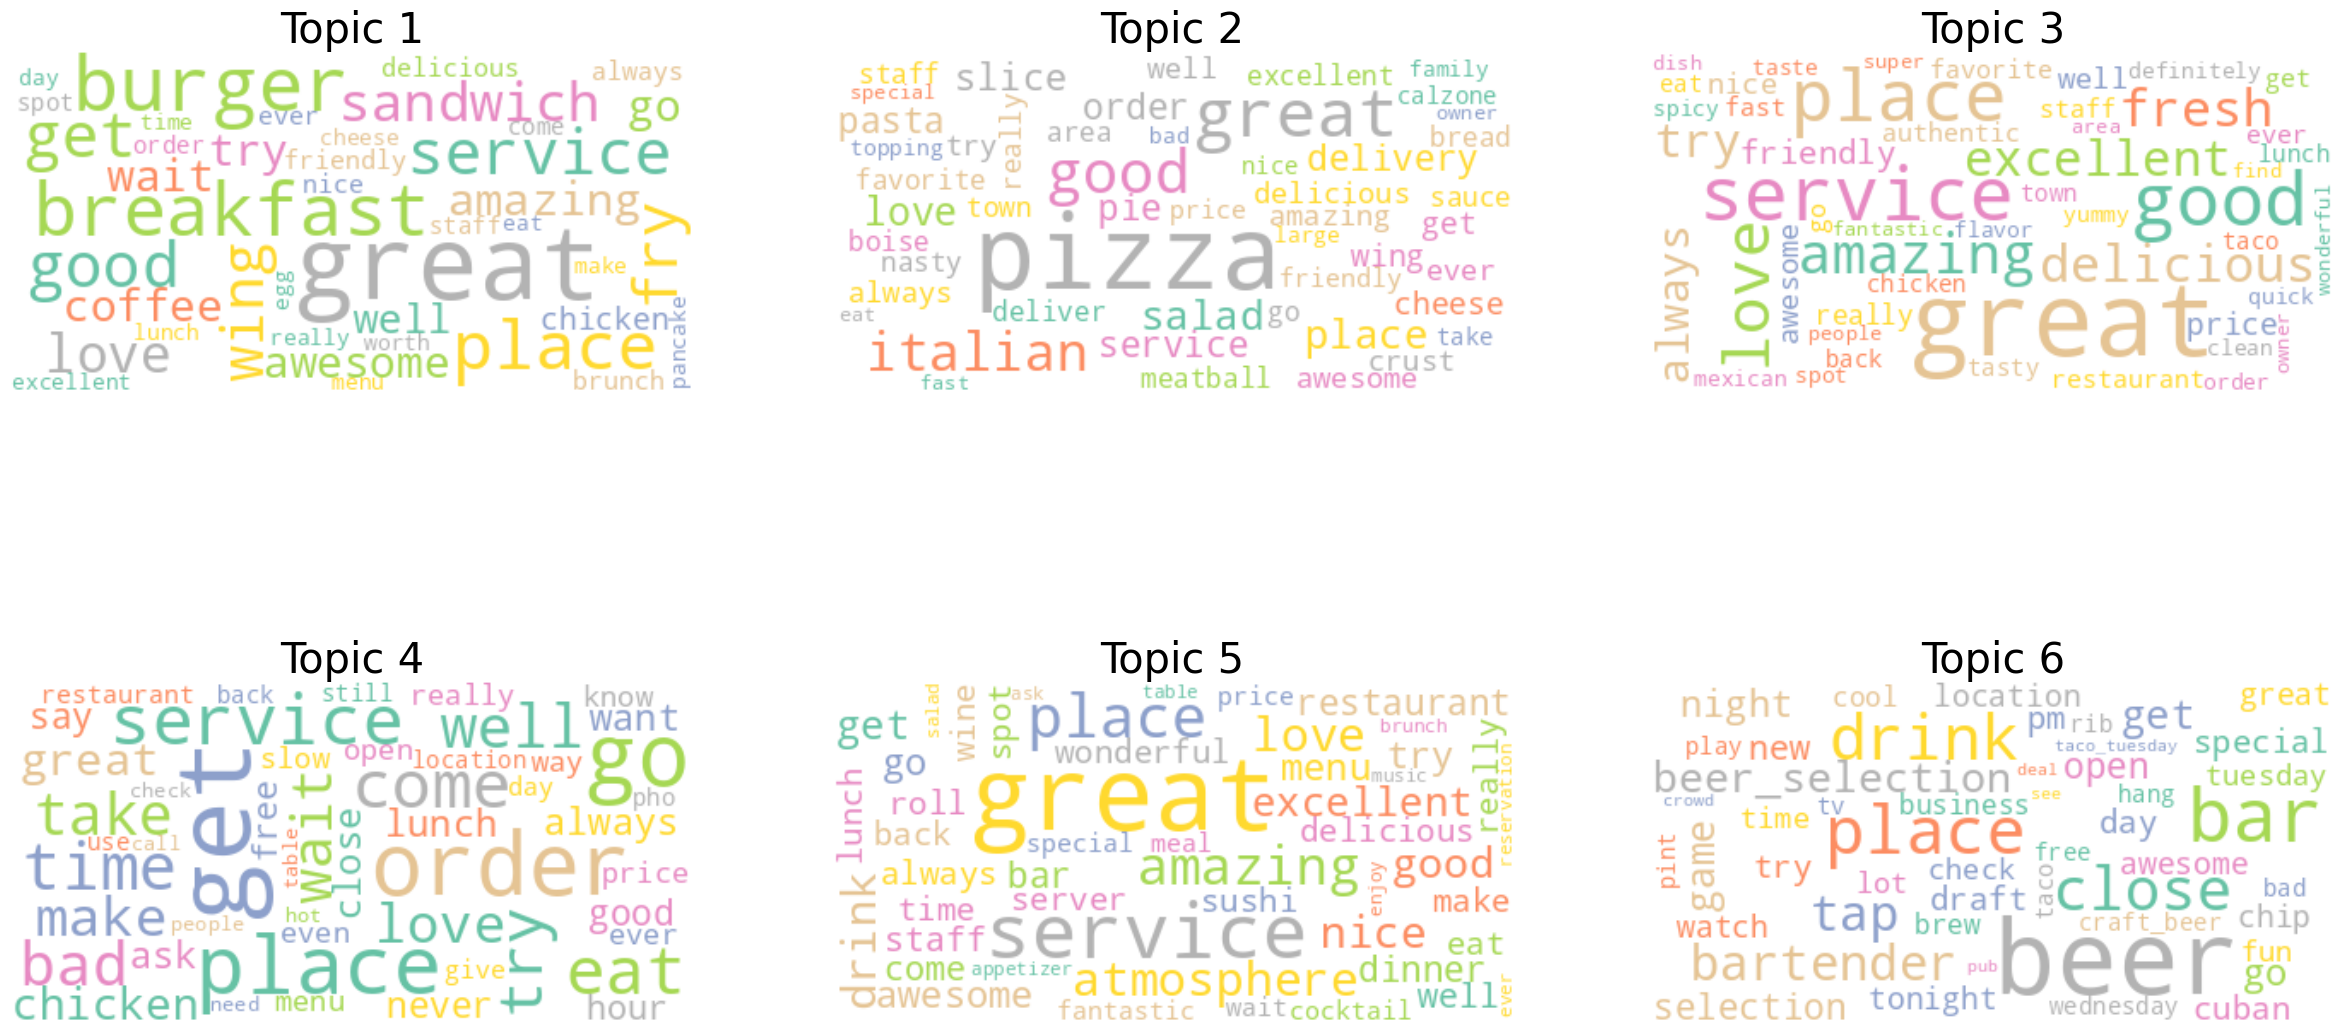

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import wordcloud

#declaring number of terms we need per topic
terms_count = 50

terms = vectorizer.get_feature_names_out()

wcloud = wordcloud.WordCloud(background_color="White",mask=None, max_words=100,\
                             max_font_size=60,min_font_size=10,prefer_horizontal=0.9,
                             contour_width=3,contour_color='Black',colormap='Set2')

fig, axes = plt.subplots(2, 3, figsize=(30, 15), sharex=True)
axes = axes.flatten()

for idx,topic in enumerate(lda.components_):
    print('Topic# ',idx+1)
    abs_topic = abs(topic)
    topic_terms = [[terms[i],topic[i]] for i in abs_topic.argsort()[:-terms_count-1:-1]]
    topic_terms_sorted = [[terms[i], topic[i]] for i in abs_topic.argsort()[:-terms_count - 1:-1]]
    topic_words = []
    for i in range(terms_count):
        topic_words.append(topic_terms_sorted[i][0])
    print(','.join( word for word in topic_words))
    print("")
    dict_word_frequency = {}

    for i in range(terms_count):
        dict_word_frequency[topic_terms_sorted[i][0]] = topic_terms_sorted[i][1]

    ax = axes[idx]
    ax.set_title(f'Topic {idx +1}',fontdict={'fontsize': 30})
    wcloud.generate_from_frequencies(dict_word_frequency)
    ax.imshow(wcloud, interpolation='bilinear')
    ax.axis("off")

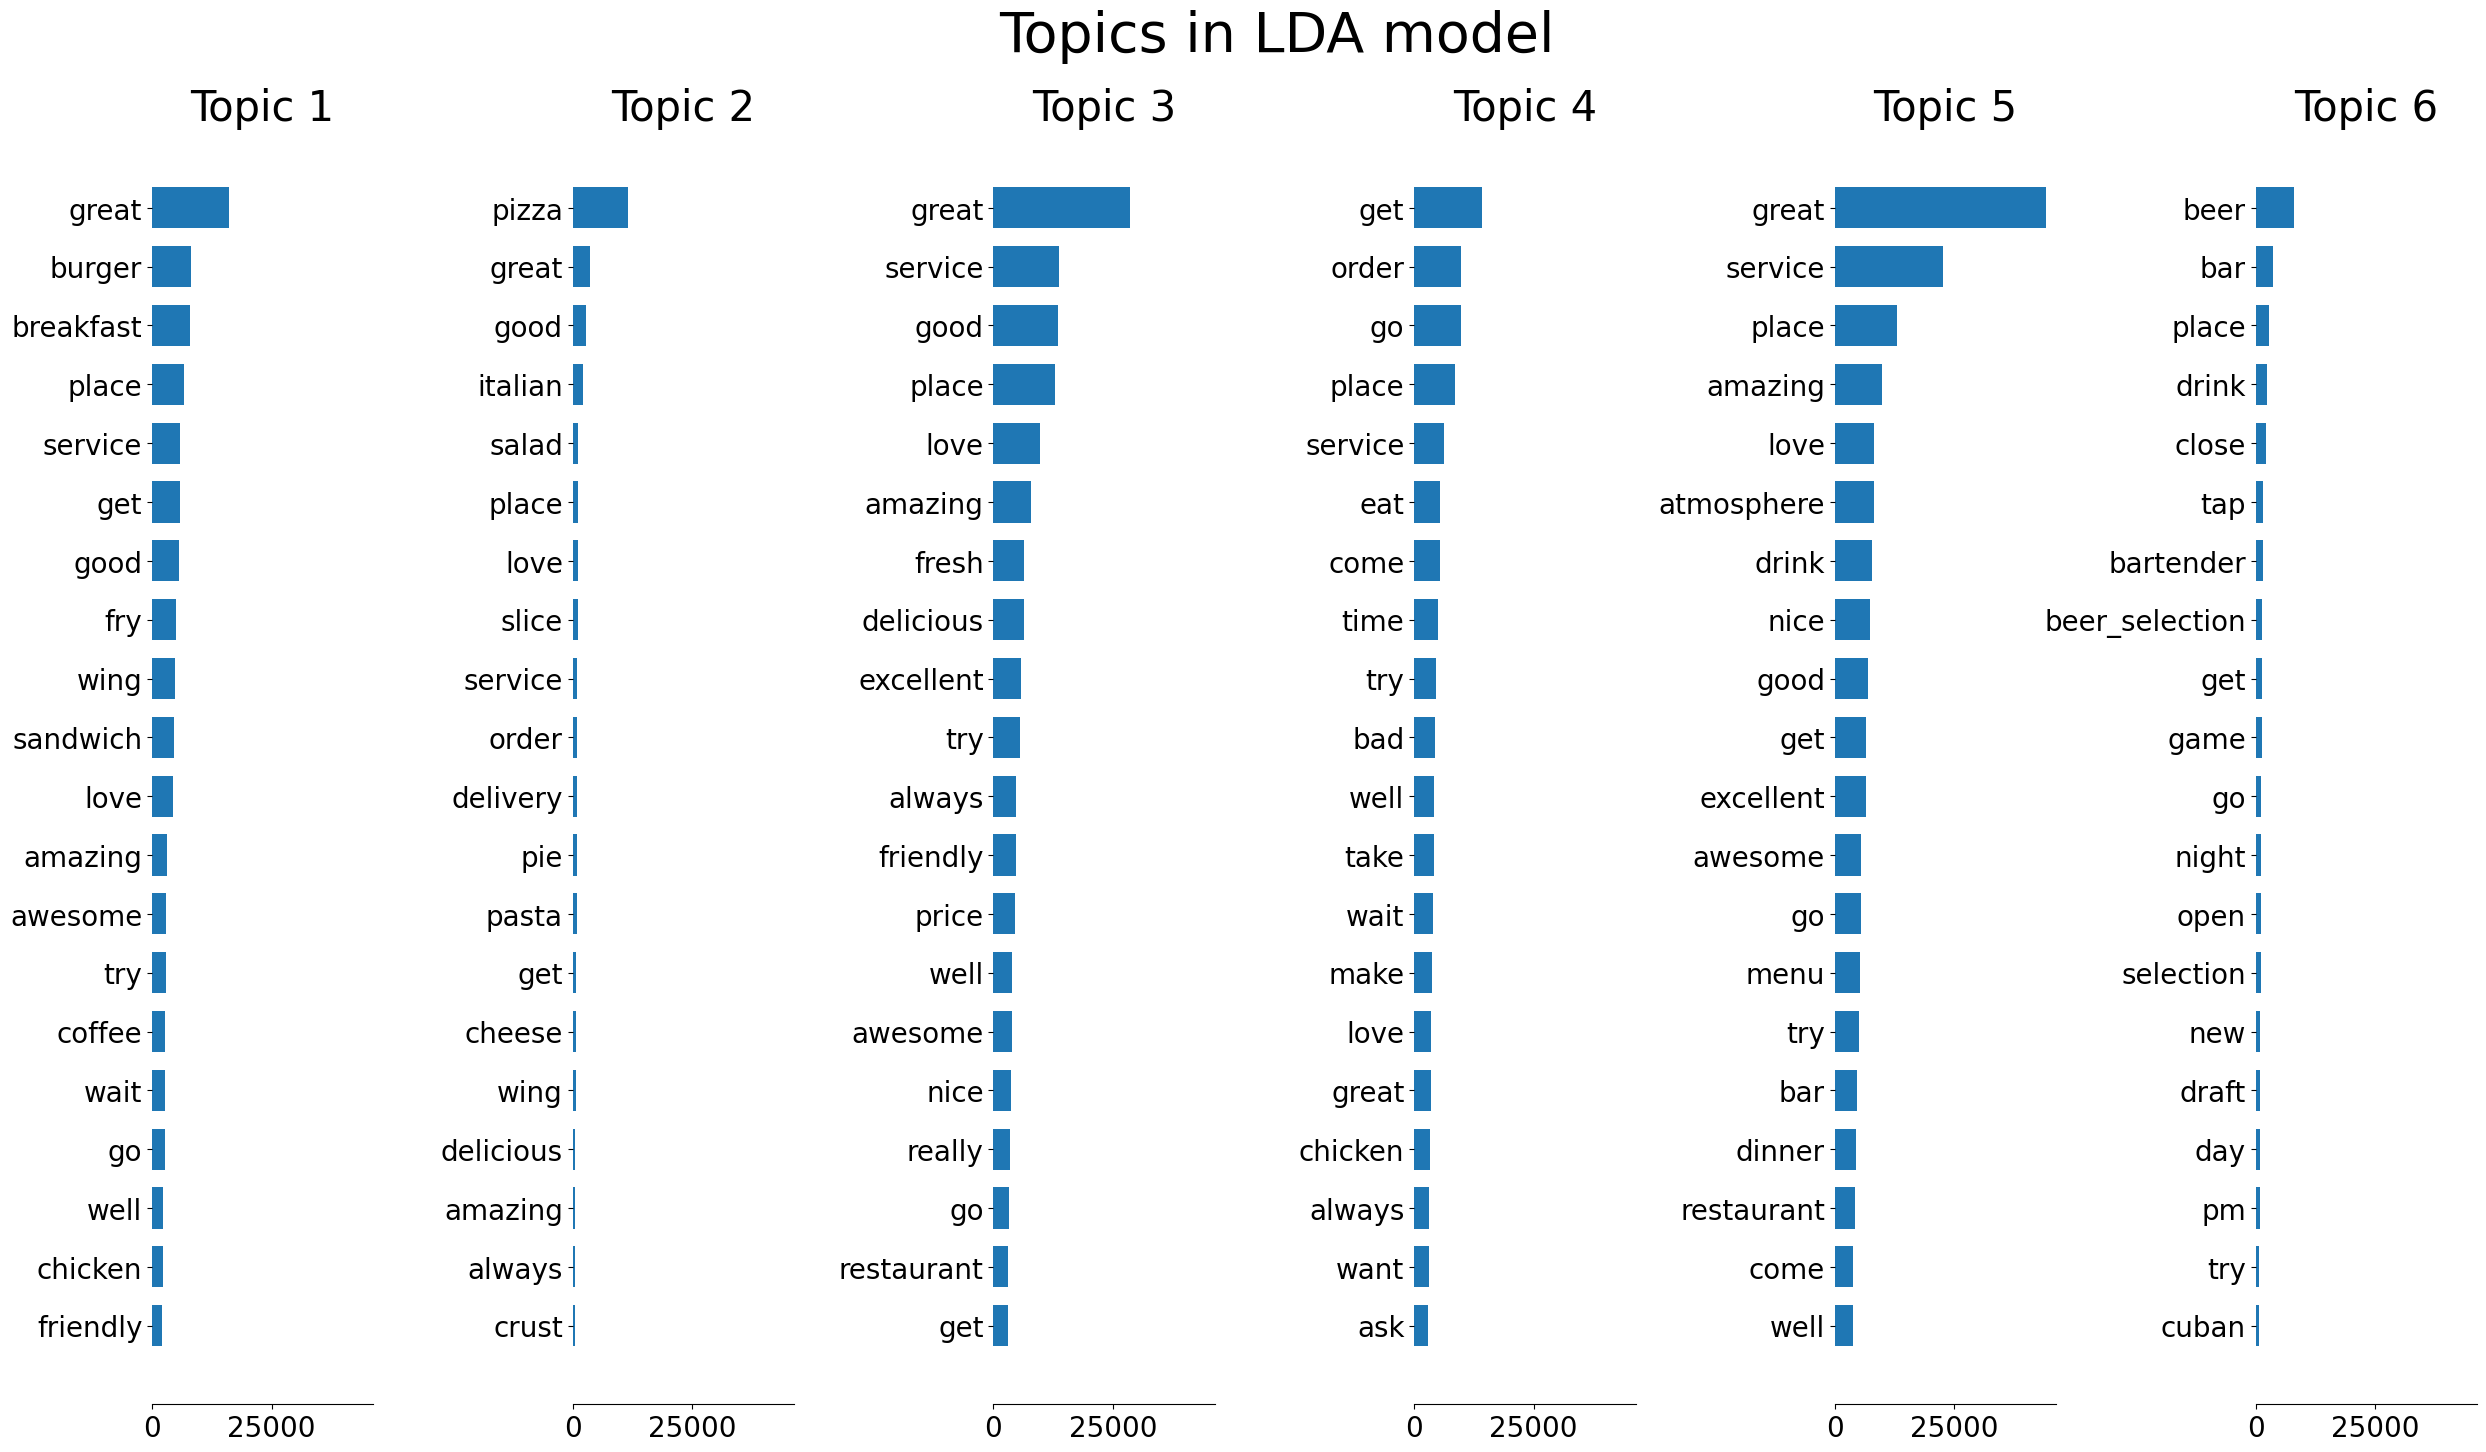

In [ ]:
# Visualise the result into bar charts in topic

%matplotlib inline
import matplotlib.pyplot as plt

# helper function to plot topics
# see Grisel et al.
# https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 6, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

n_top_words = 20  #how many words to be visualised in each topic

# get the list of words (feature names)
vec_feature_names = vectorizer.get_feature_names_out()

# print the top words per topic
plot_top_words(lda, vec_feature_names, n_top_words, 'Topics in LDA model')

In [ ]:
restaurant_tips_df_clean.to_csv('restaurant_tips_df_clean.csv', index=False)

In [ ]:
import pandas as pd

total_compliments = restaurant_tips_df_clean.groupby('business_id')['compliment_count'].sum()

sorted_total_compliments = total_compliments.sort_values(ascending=False)
top_100_total_compliments = sorted_total_compliments.head(100)

print(top_100_total_compliments)

business_id
dsfRniRgfbDjC8os848B6A    22
FEXhWNCMkv22qG04E83Qjg    18
KHe6HAqmyioITwTvg9Bbcg    14
QHWYlmVbLC3K6eglWoHVvA    12
IkY2ticzHEn4QFn8hQLSWg    12
                          ..
pXRrRf8fDv6yU3xp1E25hA     5
i4OUjrBjV3pY5xUvFnMh7w     5
EtM079Cj7-B3G7jPsGYb_Q     5
Ge00ikbJsoSxuo8AcDCgOQ     5
Meww6RIE4cFL_kG0aRlbAA     5
Name: compliment_count, Length: 100, dtype: Int64


In [ ]:
user_counts = restaurant_tips_df_clean.groupby('business_id')['user_id'].nunique()

sorted_user_counts = user_counts.sort_values(ascending=False)
top_100_user_counts = sorted_user_counts.head(100)

top_100_user_counts

business_id
FEXhWNCMkv22qG04E83Qjg    2422
_ab50qdWOk0DdB6XOrBitw     881
ytynqOUb3hjKeJfRj5Tshw     737
ac1AeYqs8Z4_e2X5M3if2A     589
iSRTaT9WngzB8JJ2YKJUig     575
                          ... 
8yR12PNSMo6FBYx1u5KPlw     188
mcr1lAEdvGLMJhuPwI3I2A     188
S8ZFYEgMejpChID8tzKo9A     187
quk6TFDQyuQ4g0KuIb9qUA     186
nTBStZYJfHGdSZJbpaBiPA     186
Name: user_id, Length: 100, dtype: int64

In [ ]:
common_business_ids = top_100_total_compliments.index.intersection(top_100_user_counts.index)
common_business_ids

Index(['dsfRniRgfbDjC8os848B6A', 'FEXhWNCMkv22qG04E83Qjg',
       'QHWYlmVbLC3K6eglWoHVvA', 'IkY2ticzHEn4QFn8hQLSWg',
       'muxda1cSVtplETqTfYVgZA', '_C7QiQQc47AOEv4PE3Kong',
       'p_qSQwShIgQnNxGcajI4-w', 'VVH6k9-ycttH3TV_lk5WfQ',
       'RqW9S4WG9UYZHKhHRHXJZg', 'ytynqOUb3hjKeJfRj5Tshw',
       'ctHjyadbDQAtUFfkcAFEHw', 'GBTPC53ZrG1ZBY3DT8Mbcw',
       'PP3BBaVxZLcJU54uP_wL6Q', '6a4gLLFSgr-Q6CZXDLzBGQ',
       'Sv1MEZP-mMfp8SmE0hwYEA', 'oBNrLz4EDhiscSlbOl8uAw',
       'DcBLYSvOuWcNReolRVr12A', 'AGlh4ZDv6jnoiYfz7At9mw',
       'I_3LMZ_1m2mzR0oLIOePIg'],
      dtype='object', name='business_id')

In [ ]:
filtered_rows = restaurant_tips_df_clean[restaurant_tips_df_clean['business_id'].isin(common_business_ids)]

filtered_rows

,user_id,business_id,text,date,compliment_count
159586,fBKrWrIcApyQ4qMlqfHefQ,6a4gLLFSgr-Q6CZXDLzBGQ,Great place for lunch. Pace is at your choice....,2017-09-18 17:50:27+00:00,0
159587,TcBhFCg8NLgMaKrOUOOk7g,6a4gLLFSgr-Q6CZXDLzBGQ,"$14.00 for four ribs, alacarte, tough and skim...",2016-05-19 18:47:13+00:00,0
159588,79Rs-Df3WIjaJ6v-9JpBYA,6a4gLLFSgr-Q6CZXDLzBGQ,Get the grilled oysters and the fried alligator!,2015-12-31 13:35:25+00:00,0
159589,ibjbv4v1QfVQPf6HHgEnIw,6a4gLLFSgr-Q6CZXDLzBGQ,This place fills up. Book a reservation or com...,2010-05-22 23:26:33+00:00,0
159590,GYRZw92Tu4CQZNuDaeQzSg,6a4gLLFSgr-Q6CZXDLzBGQ,Very popular place! Food in the salty saucy side,2011-05-27 03:01:10+00:00,0
...,...,...,...,...,...
1276584,67jznGBPOlZiZfC71RipQA,ytynqOUb3hjKeJfRj5Tshw,Seek out a map or use this pic and make an inf...,2015-03-26 12:25:52+00:00,1
1276585,oMf8iKtTw-ZevfeoySSg1g,ytynqOUb3hjKeJfRj5Tshw,Park in the 12th & Filbert St parking garage a...,2015-02-15 20:47:15+00:00,1
1276586,fCvMnJU1Z-XhAjKg99wK3Q,ytynqOUb3hjKeJfRj5Tshw,New WiFi system and extended hours during the ...,2016-07-18 18:41:34+00:00,1
1276587,fZY97UjlP-iv35beOl_OfQ,ytynqOUb3hjKeJfRj5Tshw,"It's a GINORMOUS market for everything edible,...",2016-10-08 06:53:02+00:00,1


In [ ]:
result = filtered_rows.groupby('business_id').agg({
    'user_id': 'nunique',
    'compliment_count': 'sum',
    'text': lambda x: ' '.join(x)
}).reset_index()


result.columns = ['business_id', 'user_count', 'compliment_count', 'aggregated_text']

result

,business_id,user_count,compliment_count,aggregated_text
0,6a4gLLFSgr-Q6CZXDLzBGQ,417,5,Great place for lunch. Pace is at your choice....
1,AGlh4ZDv6jnoiYfz7At9mw,348,5,Soup dumplings DUH If ordering noodle soup tak...
2,DcBLYSvOuWcNReolRVr12A,352,5,They are able to text you when your table is r...
3,FEXhWNCMkv22qG04E83Qjg,2422,18,Get here early! Open 24 hours a day! Always lo...
4,GBTPC53ZrG1ZBY3DT8Mbcw,558,6,Bad start. Rude staff. Hope it gets better. Bu...
5,I_3LMZ_1m2mzR0oLIOePIg,542,5,Great ribs...mmmmm Steak fries are available e...
6,IkY2ticzHEn4QFn8hQLSWg,254,12,Give yourself a favor and never eat here. Why?...
7,PP3BBaVxZLcJU54uP_wL6Q,372,6,Ah. Not for me. Maybe tourist. But they are wa...
8,QHWYlmVbLC3K6eglWoHVvA,475,12,"Great food, large servings, good service! The ..."
9,RqW9S4WG9UYZHKhHRHXJZg,310,7,"Awesome food and great service!!! After 1:30, ..."


In [ ]:
merged = pd.merge(result, restaurant_data_df_clean, on='business_id', how='inner')
merged

,business_id,user_count,compliment_count,aggregated_text,name,address,city,state,postal_code,latitude,...,NoiseLevel,GoodForMeal,BusinessAcceptsBitcoin,Smoking,Music,GoodForDancing,BestNights,BYOB,Corkage,Parking
0,6a4gLLFSgr-Q6CZXDLzBGQ,417,5,Great place for lunch. Pace is at your choice....,Cochon,930 Tchoupitoulas St,New Orleans,LA,70130,29.942280,...,'average',"{'dessert': False, 'latenight': False, 'lunch'...",<NA>,None,None,<NA>,None,<NA>,<NA>,True
1,AGlh4ZDv6jnoiYfz7At9mw,348,5,Soup dumplings DUH If ordering noodle soup tak...,Dim Sum Garden,1020 Race St,Philadelphia,PA,19107,39.955399,...,'average',"{'dessert': False, 'latenight': False, 'lunch'...",<NA>,None,None,<NA>,None,False,True,True
2,DcBLYSvOuWcNReolRVr12A,352,5,They are able to text you when your table is r...,Drago's Seafood Restaurant,2 Poydras St,New Orleans,LA,70140,29.947563,...,'average',"{'dessert': None, 'latenight': False, 'lunch':...",<NA>,None,None,<NA>,None,<NA>,<NA>,True
3,FEXhWNCMkv22qG04E83Qjg,2422,18,Get here early! Open 24 hours a day! Always lo...,Café Du Monde,800 Decatur St,New Orleans,LA,70116,29.957525,...,'loud',"{'dessert': True, 'latenight': False, 'lunch':...",False,None,None,<NA>,None,<NA>,<NA>,True
4,GBTPC53ZrG1ZBY3DT8Mbcw,558,6,Bad start. Rude staff. Hope it gets better. Bu...,Luke,333 Saint Charles Ave,New Orleans,LA,70130,29.950742,...,'average',"{'dessert': False, 'latenight': False, 'lunch'...",False,'no',"{'dj': False, 'background_music': False, 'no_m...",False,"{'monday': False, 'tuesday': False, 'friday': ...",<NA>,<NA>,True
5,I_3LMZ_1m2mzR0oLIOePIg,542,5,Great ribs...mmmmm Steak fries are available e...,Pappy's Smokehouse,3106 Olive St,Saint Louis,MO,63103,38.635147,...,'average',"{'dessert': False, 'latenight': False, 'lunch'...",<NA>,None,None,<NA>,None,<NA>,<NA>,True
6,IkY2ticzHEn4QFn8hQLSWg,254,12,Give yourself a favor and never eat here. Why?...,Geno's Steaks,1219 S 9th St,Philadelphia,PA,19147,39.933837,...,'average',"{'dessert': False, 'latenight': True, 'lunch':...",<NA>,None,None,<NA>,None,<NA>,False,True
7,PP3BBaVxZLcJU54uP_wL6Q,372,6,Ah. Not for me. Maybe tourist. But they are wa...,Pat's King of Steaks,1237 E Passyunk Ave,Philadelphia,PA,19147,39.933201,...,'average',"{'dessert': False, 'latenight': True, 'lunch':...",<NA>,None,None,<NA>,None,<NA>,False,True
8,QHWYlmVbLC3K6eglWoHVvA,475,12,"Great food, large servings, good service! The ...",Datz,2616 S MacDill Ave,Tampa,FL,33629,27.921942,...,'average',"{'dessert': None, 'latenight': False, 'lunch':...",False,None,"{'dj': False, 'background_music': True, 'no_mu...",False,"{'monday': False, 'tuesday': False, 'friday': ...",False,<NA>,True
9,RqW9S4WG9UYZHKhHRHXJZg,310,7,"Awesome food and great service!!! After 1:30, ...",Lolis Mexican Cravings,8005 Benjamin Rd,Tampa,FL,33634,28.022388,...,'average',"{'dessert': False, 'latenight': False, 'lunch'...",<NA>,None,None,<NA>,None,<NA>,<NA>,True


In [ ]:
top_19= merged.iloc[:, list(range(8)) + list(range(9, 14))]
top_19

,business_id,user_count,compliment_count,aggregated_text,name,address,city,state,latitude,longitude,stars,review_count,is_open
0,6a4gLLFSgr-Q6CZXDLzBGQ,417,5,Great place for lunch. Pace is at your choice....,Cochon,930 Tchoupitoulas St,New Orleans,LA,29.942280,-90.067268,4.0,4421,1
1,AGlh4ZDv6jnoiYfz7At9mw,348,5,Soup dumplings DUH If ordering noodle soup tak...,Dim Sum Garden,1020 Race St,Philadelphia,PA,39.955399,-75.156727,4.0,2672,1
2,DcBLYSvOuWcNReolRVr12A,352,5,They are able to text you when your table is r...,Drago's Seafood Restaurant,2 Poydras St,New Orleans,LA,29.947563,-90.063311,3.5,3160,1
3,FEXhWNCMkv22qG04E83Qjg,2422,18,Get here early! Open 24 hours a day! Always lo...,Café Du Monde,800 Decatur St,New Orleans,LA,29.957525,-90.061861,4.0,1880,1
4,GBTPC53ZrG1ZBY3DT8Mbcw,558,6,Bad start. Rude staff. Hope it gets better. Bu...,Luke,333 Saint Charles Ave,New Orleans,LA,29.950742,-90.070416,4.0,4554,1
5,I_3LMZ_1m2mzR0oLIOePIg,542,5,Great ribs...mmmmm Steak fries are available e...,Pappy's Smokehouse,3106 Olive St,Saint Louis,MO,38.635147,-90.224003,4.5,3999,1
6,IkY2ticzHEn4QFn8hQLSWg,254,12,Give yourself a favor and never eat here. Why?...,Geno's Steaks,1219 S 9th St,Philadelphia,PA,39.933837,-75.158814,2.5,3401,1
7,PP3BBaVxZLcJU54uP_wL6Q,372,6,Ah. Not for me. Maybe tourist. But they are wa...,Pat's King of Steaks,1237 E Passyunk Ave,Philadelphia,PA,39.933201,-75.159266,3.0,4250,1
8,QHWYlmVbLC3K6eglWoHVvA,475,12,"Great food, large servings, good service! The ...",Datz,2616 S MacDill Ave,Tampa,FL,27.921942,-82.493253,4.0,3260,1
9,RqW9S4WG9UYZHKhHRHXJZg,310,7,"Awesome food and great service!!! After 1:30, ...",Lolis Mexican Cravings,8005 Benjamin Rd,Tampa,FL,28.022388,-82.541432,4.5,1449,1


In [ ]:
query = f"""
    SELECT *
    FROM `{project_id}.{dataset_name}.restaurant_checkin`
    ORDER BY business_id
"""

query_job_checkin = bigquery_client.query(query)
results = query_job_checkin.result()

restaurant_checkin_df = query_job_checkin.to_dataframe()
restaurant_checkin_df.head()

,business_id,date,total_number_of_checkin,restaurant,year,month,day,hour
0,---kPU91CF4Lq2-WlRu9Lw,2020-03-13 21:10:56+00:00,11,True,2020,3,13,21
1,---kPU91CF4Lq2-WlRu9Lw,2021-08-06 21:08:08+00:00,11,True,2021,8,6,21
2,---kPU91CF4Lq2-WlRu9Lw,2020-10-24 21:36:13+00:00,11,True,2020,10,24,21
3,---kPU91CF4Lq2-WlRu9Lw,2021-05-25 21:16:54+00:00,11,True,2021,5,25,21
4,---kPU91CF4Lq2-WlRu9Lw,2021-01-20 17:34:57+00:00,11,True,2021,1,20,17


In [ ]:
restaurant_checkin_df.duplicated().sum()

8517905

In [ ]:
restaurant_checkin_df_clean = restaurant_checkin_df.drop_duplicates()

In [ ]:
restaurant_checkin_df_clean.isnull().sum()

business_id                0
date                       0
total_number_of_checkin    0
restaurant                 0
year                       0
month                      0
day                        0
hour                       0
dtype: int64

In [ ]:
restaurant_checkin_df_clean

,business_id,date,total_number_of_checkin,restaurant,year,month,day,hour
0,---kPU91CF4Lq2-WlRu9Lw,2020-03-13 21:10:56+00:00,11,True,2020,3,13,21
1,---kPU91CF4Lq2-WlRu9Lw,2021-08-06 21:08:08+00:00,11,True,2021,8,6,21
2,---kPU91CF4Lq2-WlRu9Lw,2020-10-24 21:36:13+00:00,11,True,2020,10,24,21
3,---kPU91CF4Lq2-WlRu9Lw,2021-05-25 21:16:54+00:00,11,True,2021,5,25,21
4,---kPU91CF4Lq2-WlRu9Lw,2021-01-20 17:34:57+00:00,11,True,2021,1,20,17
...,...,...,...,...,...,...,...,...
17031141,zzu6_r3DxBJuXcjnOYVdTw,2012-10-28 00:35:18+00:00,23,True,2012,10,28,0
17031145,zzu6_r3DxBJuXcjnOYVdTw,2013-07-14 00:29:38+00:00,23,True,2013,7,14,0
17031146,zzu6_r3DxBJuXcjnOYVdTw,2013-05-09 23:59:54+00:00,23,True,2013,5,9,23
17031148,zzu6_r3DxBJuXcjnOYVdTw,2013-12-13 00:58:14+00:00,23,True,2013,12,13,0


In [ ]:
checkin_num = restaurant_checkin_df_clean[['business_id', 'total_number_of_checkin']]
checkin_num

,business_id,total_number_of_checkin
0,---kPU91CF4Lq2-WlRu9Lw,11
1,---kPU91CF4Lq2-WlRu9Lw,11
2,---kPU91CF4Lq2-WlRu9Lw,11
3,---kPU91CF4Lq2-WlRu9Lw,11
4,---kPU91CF4Lq2-WlRu9Lw,11
...,...,...
17031141,zzu6_r3DxBJuXcjnOYVdTw,23
17031145,zzu6_r3DxBJuXcjnOYVdTw,23
17031146,zzu6_r3DxBJuXcjnOYVdTw,23
17031148,zzu6_r3DxBJuXcjnOYVdTw,23


In [ ]:
checkin_num.duplicated().sum()

8461941

In [ ]:
checkin_num_clean = checkin_num.drop_duplicates()
checkin_num_clean

,business_id,total_number_of_checkin
0,---kPU91CF4Lq2-WlRu9Lw,11
22,--0iUa4sNDFiZFrAdIWhZQ,10
42,--7PUidqRWpRSpXebiyxTg,10
62,--8IbOsAAxjKRoYsBFL-PA,32
126,--ZVrH2X2QXBFdCilbirsw,67
...,...,...
17030926,zzjFdJwXuxBOGe9JeY_EMw,27
17030980,zznJox6-nmXlGYNWgTDwQQ,67
17031114,zznZqH9CiAznbkV6fXyHWA,1
17031116,zzu6_r3DxBJuXcjnOYVdTw,23


In [ ]:
top_19_condition = pd.merge(top_19, checkin_num_clean, on='business_id', how='inner')
top_19_condition

,business_id,user_count,compliment_count,aggregated_text,name,address,city,state,latitude,longitude,stars,review_count,is_open,total_number_of_checkin
0,6a4gLLFSgr-Q6CZXDLzBGQ,417,5,Great place for lunch. Pace is at your choice....,Cochon,930 Tchoupitoulas St,New Orleans,LA,29.942280,-90.067268,4.0,4421,1,8503
1,AGlh4ZDv6jnoiYfz7At9mw,348,5,Soup dumplings DUH If ordering noodle soup tak...,Dim Sum Garden,1020 Race St,Philadelphia,PA,39.955399,-75.156727,4.0,2672,1,6377
2,DcBLYSvOuWcNReolRVr12A,352,5,They are able to text you when your table is r...,Drago's Seafood Restaurant,2 Poydras St,New Orleans,LA,29.947563,-90.063311,3.5,3160,1,5672
3,FEXhWNCMkv22qG04E83Qjg,2422,18,Get here early! Open 24 hours a day! Always lo...,Café Du Monde,800 Decatur St,New Orleans,LA,29.957525,-90.061861,4.0,1880,1,40109
4,GBTPC53ZrG1ZBY3DT8Mbcw,558,6,Bad start. Rude staff. Hope it gets better. Bu...,Luke,333 Saint Charles Ave,New Orleans,LA,29.950742,-90.070416,4.0,4554,1,9390
5,I_3LMZ_1m2mzR0oLIOePIg,542,5,Great ribs...mmmmm Steak fries are available e...,Pappy's Smokehouse,3106 Olive St,Saint Louis,MO,38.635147,-90.224003,4.5,3999,1,6178
6,IkY2ticzHEn4QFn8hQLSWg,254,12,Give yourself a favor and never eat here. Why?...,Geno's Steaks,1219 S 9th St,Philadelphia,PA,39.933837,-75.158814,2.5,3401,1,4959
7,PP3BBaVxZLcJU54uP_wL6Q,372,6,Ah. Not for me. Maybe tourist. But they are wa...,Pat's King of Steaks,1237 E Passyunk Ave,Philadelphia,PA,39.933201,-75.159266,3.0,4250,1,7264
8,QHWYlmVbLC3K6eglWoHVvA,475,12,"Great food, large servings, good service! The ...",Datz,2616 S MacDill Ave,Tampa,FL,27.921942,-82.493253,4.0,3260,1,6820
9,RqW9S4WG9UYZHKhHRHXJZg,310,7,"Awesome food and great service!!! After 1:30, ...",Lolis Mexican Cravings,8005 Benjamin Rd,Tampa,FL,28.022388,-82.541432,4.5,1449,1,1716


In [ ]:
top_19_condition.to_csv('top_19_condition.csv', index=False)